# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [3]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df['target'] = iris_data.target
    df['class'] = iris_data.target_names[df.target]
    df.columns = [col.replace("(cm)", "").strip() for col in df.columns]
    return df

df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
62,6.0,2.2,4.0,1.0,1,versicolor
145,6.7,3.0,5.2,2.3,2,virginica
89,5.5,2.5,4.0,1.3,1,versicolor
108,6.7,2.5,5.8,1.8,2,virginica
70,5.9,3.2,4.8,1.8,1,versicolor
65,6.7,3.1,4.4,1.4,1,versicolor
3,4.6,3.1,1.5,0.2,0,setosa
80,5.5,2.4,3.8,1.1,1,versicolor
84,5.4,3.0,4.5,1.5,1,versicolor
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [5]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = np.array(df_iris.iloc[:,0:4])

In [6]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [7]:
# YOUR CODE HERE
mergings = linkage(x, method='complete')

In [8]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

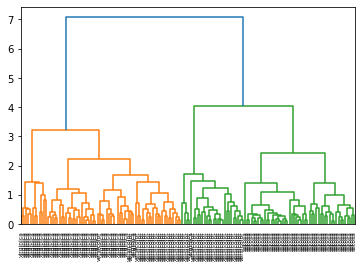

In [9]:
dn = 0
# YOUR CODE HERE
varieties = list(df_iris['class'])
dn = dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)
plt.show()

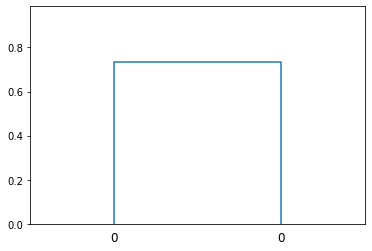

In [10]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [11]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [12]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters=3)

In [13]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [14]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [15]:
# YOUR CODE HERE
labels = model.predict(points)

In [16]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [34]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for i in range(len(labels)):
        if labels[i] == 0:
            data_0.append(points[i])
        if labels[i] == 1:
            data_1.append(points[i])
        if labels[i] == 2:
            data_2.append(points[i])

    return np.array(data_0),np.array(data_1),np.array(data_2)


data_0,data_1,data_2 = separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95, 2)
(111, 2)
(94, 2)


In [35]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

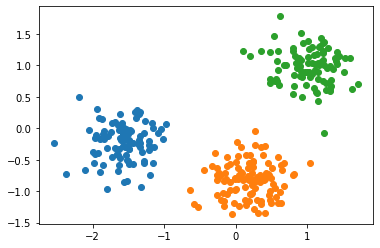

In [42]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1])
plt.scatter(data_1[:,0],data_1[:,1])
plt.scatter(data_2[:,0],data_2[:,1])

plt.show()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [43]:

# YOUR CODE HERE
new_labels = model.predict(new_points)

In [44]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [45]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
new_0,new_1,new_2 = separate_labels(new_labels, new_points)

In [46]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

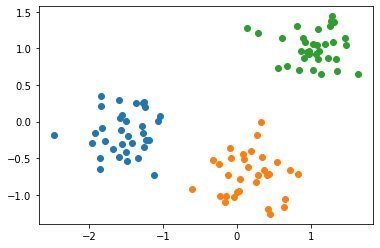

In [50]:
#plot the new labels

# YOUR CODE HERE
plt.scatter(new_0[:,0],new_0[:,1])
plt.scatter(new_1[:,0],new_1[:,1])
plt.scatter(new_2[:,0],new_2[:,1])

plt.show()

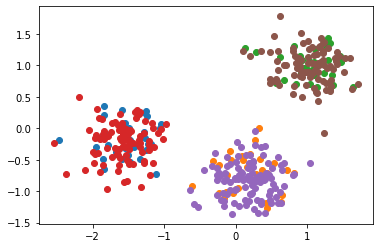

In [51]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(new_0[:,0],new_0[:,1])
plt.scatter(new_1[:,0],new_1[:,1])
plt.scatter(new_2[:,0],new_2[:,1])

plt.scatter(data_0[:,0],data_0[:,1])
plt.scatter(data_1[:,0],data_1[:,1])
plt.scatter(data_2[:,0],data_2[:,1])

plt.show()